In [2]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np

In [3]:
### .pcm 파일을 .wav 파일로 바꾸는 함수
import wave

# The parameters are prerequisite information. More specifically,
# channels, bit_depth, sampling_rate must be known to use this function.
def pcm2wav( pcm_file, wav_file, channels=1, bit_depth=16, sampling_rate=16000 ):

    # Check if the options are valid.
    if bit_depth % 8 != 0:
        raise ValueError("bit_depth "+str(bit_depth)+" must be a multiple of 8.")
        
    # Read the .pcm file as a binary file and store the data to pcm_data
    with open( pcm_file, 'rb') as opened_pcm_file:
        pcm_data = opened_pcm_file.read();
        
        obj2write = wave.open( wav_file, 'wb')
        obj2write.setnchannels( channels )
        obj2write.setsampwidth( bit_depth // 8 )
        obj2write.setframerate( sampling_rate )
        obj2write.writeframes( pcm_data )
        obj2write.close()

In [39]:
def four_sec_cutter(path):
    sr = 16000
    duration = sr * 4
    
    raw_npy = np.empty((0, duration), np.float32)
    mfcc_npy = np.empty((0, 20, 126), np.float32) 
    
    x = librosa.load(path, sr=sr)[0]
    
    num_4sec = len(x) // (duration)
    
    for j in range(num_4sec):
        start = (duration) * j
        end = (duration) * (j + 1)

        cutter_4sec = x[start:end]
        mfcc = librosa.feature.mfcc(y=cutter_4sec, sr=sr, n_mfcc=20)

        cutter_4sec = cutter_4sec.reshape((1,) + cutter_4sec.shape)
        mfcc = mfcc.reshape((1,) + mfcc.shape)

        raw_npy = np.concatenate((raw_npy, cutter_4sec), axis=0)
        mfcc_npy = np.concatenate((mfcc_npy, mfcc), axis=0)
    
    return raw_npy, mfcc_npy

In [7]:
### 새로 받은 한국어 음성 데이터 1번부터 1000번까지 wav 파일로 변환
for i in range(1, 751):
    pcm_path = './audio_data/KsponSpeech/KsponSpeech_0002/KsponSpeech_001' + '{0:03d}'.format(i) + '.pcm'
    wav_path = './audio_data/Kspon_wav/Kspon_wav_02/Kspon_wav_001' + '{0:03d}'.format(i) + '.wav'
    pcm2wav( pcm_path, wav_path, 1, 16, 16000 )

In [53]:
kspon_wav_npy = np.empty((0, 64000), np.float32)
kspon_mfcc_npy = np.empty((0, 20, 126), np.float32)

for i in range(1, 1001):
    wav_path = 'audio_data/Kspon_wav/Kspon_wav_01/Kspon_wav_' + '{0:06d}'.format(i) + '.wav'
    
    raw_npy, mfcc_npy = four_sec_cutter(wav_path)
    kspon_wav_npy = np.concatenate((kspon_wav_npy, raw_npy), axis=0)
    kspon_mfcc_npy = np.concatenate((kspon_mfcc_npy, mfcc_npy), axis=0)

In [56]:
for i in range(1, 751):
    wav_path = 'audio_data/Kspon_wav/Kspon_wav_02/Kspon_wav_001' + '{0:03d}'.format(i) + '.wav'
    
    raw_npy, mfcc_npy = four_sec_cutter(wav_path)
    kspon_wav_npy = np.concatenate((kspon_wav_npy, raw_npy), axis=0)
    kspon_mfcc_npy = np.concatenate((kspon_mfcc_npy, mfcc_npy), axis=0)

In [57]:
print('shape of kspon_wav_npy:', kspon_wav_npy.shape)
print('shape of kspon_mfcc_npy:', kspon_mfcc_npy.shape)

shape of kspon_wav_npy: (1525, 64000)
shape of kspon_mfcc_npy: (1525, 20, 126)


In [58]:
np.save('./audio_data/npy_data/foursec/Kspon_wav_npy.npy', kspon_wav_npy)
np.save('./audio_data/npy_data/foursec/kspon_mfcc_npy.npy', kspon_mfcc_npy)

In [60]:
noise_cafe1_path = 'audio_data/noise/noise_cafe1.wav'
noise_cafe2_path = 'audio_data/noise/noise_cafe2.wav'
noise_room_path = 'audio_data/noise/noise_room_wav.wav'
noise_window_path = 'audio_data/noise/noise_window_wav.wav'

noise_cafe1_npy, noise_cafe1_mfcc_npy = four_sec_cutter(noise_cafe1_path)
noise_cafe2_npy, noise_cafe2_mfcc_npy = four_sec_cutter(noise_cafe2_path)
noise_room_npy, noise_room_mfcc_npy = four_sec_cutter(noise_room_path)
noise_window_npy, noise_window_mfcc_npy= four_sec_cutter(noise_window_path)

In [64]:
print('shape of noise_window_mfcc_npy:', noise_window_mfcc_npy.shape)
print('shape of noise_cafe1_mfcc_npy:', noise_cafe1_mfcc_npy.shape)
print('shape of noise_cafe2_mfcc_npy:', noise_cafe2_mfcc_npy.shape)
print('shape of noise_room_mfcc_npy:', noise_room_mfcc_npy.shape)

shape of noise_window_mfcc_npy: (375, 20, 126)
shape of noise_cafe1_mfcc_npy: (300, 20, 126)
shape of noise_cafe2_mfcc_npy: (186, 20, 126)
shape of noise_room_mfcc_npy: (377, 20, 126)


In [63]:
noise_cafe_mfcc_npy = np.concatenate((noise_cafe1_mfcc_npy, 
                                      noise_cafe2_mfcc_npy[:100]), 
                                     axis=0)
noise_cafe_mfcc_npy.shape

(400, 20, 126)

In [65]:
noise_mfcc_npy = np.concatenate((noise_window_mfcc_npy, noise_cafe_mfcc_npy, noise_room_mfcc_npy),
                               axis=0)
noise_mfcc_npy.shape

(1152, 20, 126)

In [ ]:
np.save('audio_data/npy_data/foursec/noise_mfcc_npy.npy', noise_mfcc_npy)

In [18]:
noise_room_path = 'audio_data/noise/noise_room_wav.wav'

noise_room_npy, noise_room_mfcc_npy = one_sec_cutter(noise_room_path)

In [23]:
print('shape of noise_room_mfcc_npy:', noise_room_mfcc_npy.shape)

shape of noise_room_mfcc_npy: (1511, 32, 32)


In [24]:
noise_room_mfcc_npy = noise_room_mfcc_npy[:1500]
noise_room_mfcc_npy.shape

(1500, 32, 32)

In [26]:
np.save('audio_data/npy_data/noise_room_mfcc_npy.npy', noise_room_mfcc_npy)

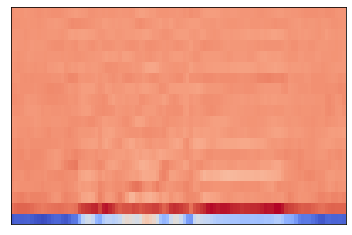

In [50]:
path = 'audio_data/Kspon_wav/KsponSpeech_wav_0001/Kspon_wav_000001.wav'

x = librosa.load(path, 16000)[0]
mfcc1 = librosa.feature.mfcc(x)
librosa.display.specshow(mfcc1)

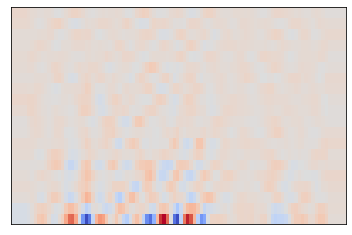

In [53]:
S = librosa.feature.melspectrogram(x, sr=16000, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
mfcc2 = librosa.feature.mfcc(S=log_S, n_mfcc=20)
delta = librosa.feature.delta(mfcc, order=2)
librosa.display.specshow(delta)

In [54]:
print(mfcc1.shape, mfcc2.shape, delta.shape)

(20, 99) (20, 99) (20, 99)


In [43]:
kspon_wav_npy = np.empty((0, 64000), np.float32)
kspon_wav_np.shape

NameError: name 'kspon_wav_np' is not defined